In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math

import sys

import numpy as np

import matplotlib.pyplot as plt

import keras

import pandas as pd

import numpy as np

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

from keras.layers import *

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

In [3]:
%cd /content/drive/MyDrive/학교/3학년2학기/소프트웨어융합개론/coin/indicator

/content/drive/MyDrive/학교/3학년2학기/소프트웨어융합개론/coin/indicator


In [4]:
df=pd.read_csv("bitcoin_indicator.csv")
df_time = pd.read_csv("time.csv")
print('Number of rows and columns:', df.shape)

time_step = 30
index_rsi = 14
n_days = 15

df

Number of rows and columns: (3962, 25)


,close,close_log,nvi,pvi,ma_5,ma_10,ma_20,ma_60,rsi,vpt,...,mfi,ema_5,ema_10,ema_20,ema_60,fi,ubb,mbb,lbb,volume
0,3091000.0,14.944005,1.163482,3063000.0,3084200.0,3170200.0,3289500.0,3.215300e+06,24.735450,-50913.192669,...,53.117928,3.101464e+06,3.154992e+06,3.207830e+06,3.195372e+06,-2.058452e+09,3.610062e+06,3289500.0,2.968938e+06,5388.617973
1,3087000.0,14.942710,1.163482,3087000.0,3088600.0,3137500.0,3279000.0,3.216817e+06,25.546448,-50921.710773,...,54.027715,3.096642e+06,3.142630e+06,3.196323e+06,3.191819e+06,-2.356487e+09,3.612042e+06,3279000.0,2.945958e+06,6582.364759
2,3071000.0,14.937514,1.157451,3087000.0,3085200.0,3106200.0,3262700.0,3.216783e+06,25.304465,-50942.230512,...,52.648713,3.088095e+06,3.129606e+06,3.184387e+06,3.187857e+06,-1.445045e+09,3.603251e+06,3262700.0,2.922149e+06,3959.027066
3,3050000.0,14.930652,1.157451,3050000.0,3072400.0,3086100.0,3243350.0,3.215633e+06,26.044568,-50979.943691,...,53.324172,3.075397e+06,3.115132e+06,3.171588e+06,3.183338e+06,-1.897196e+09,3.586173e+06,3243350.0,2.900527e+06,5515.103573
4,3003000.0,14.915122,1.139615,3050000.0,3060400.0,3063700.0,3223000.0,3.214083e+06,25.442177,-51042.834596,...,54.476339,3.051264e+06,3.094745e+06,3.155532e+06,3.177425e+06,-1.473320e+09,3.572426e+06,3223000.0,2.873574e+06,4081.218313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,22320000.0,16.920994,19.407960,22320000.0,22490200.0,22593100.0,22691850.0,2.493500e+07,46.624136,2341.093255,...,53.458386,2.245848e+07,2.256368e+07,2.277992e+07,2.431527e+07,-2.116684e+08,2.316037e+07,22691850.0,2.222333e+07,1666.680241
3958,22403000.0,16.924705,19.480131,22320000.0,22430800.0,22571300.0,22662550.0,2.482275e+07,48.006214,2346.997775,...,53.335951,2.243999e+07,2.253446e+07,2.274402e+07,2.425257e+07,-1.222620e+08,2.312610e+07,22662550.0,2.219900e+07,1587.817986
3959,23004000.0,16.951179,19.480131,23004000.0,22496800.0,22612900.0,22660250.0,2.472663e+07,51.684312,2391.934249,...,43.927284,2.262799e+07,2.261983e+07,2.276878e+07,2.421164e+07,1.172543e+08,2.311609e+07,22660250.0,2.220441e+07,1675.061266
3960,22790000.0,16.941832,19.298913,23004000.0,22581400.0,22618800.0,22651250.0,2.462907e+07,47.797063,2377.924759,...,45.856043,2.268200e+07,2.265077e+07,2.277080e+07,2.416503e+07,-1.490895e+08,2.308805e+07,22651250.0,2.221445e+07,1505.954700


In [5]:
df_time = df_time.iloc[:,0]

In [6]:
df_time = df_time.str[:10]

# training set/ test set

In [7]:
feature = df.iloc[:,1:]

idx = int(feature.shape[0]*0.8)

training_set = feature.iloc[:idx].values
test_set = feature.iloc[idx:].values
training_set.shape

(3169, 24)

In [8]:
training_set

array([[1.49440052e+01, 1.16348160e+00, 3.06300000e+06, ...,
        3.28950000e+06, 2.96893767e+06, 5.38861797e+03],
       [1.49427103e+01, 1.16348160e+00, 3.08700000e+06, ...,
        3.27900000e+06, 2.94595788e+06, 6.58236476e+03],
       [1.49375138e+01, 1.15745125e+00, 3.08700000e+06, ...,
        3.26270000e+06, 2.92214868e+06, 3.95902707e+03],
       ...,
       [1.81156490e+01, 2.14693282e+01, 7.37100000e+07, ...,
        7.54120500e+07, 7.09528907e+07, 2.58543345e+03],
       [1.81241328e+01, 2.16522442e+01, 7.37100000e+07, ...,
        7.52044000e+07, 7.09676991e+07, 2.22946506e+03],
       [1.81121971e+01, 2.13953462e+01, 7.37100000e+07, ...,
        7.48318500e+07, 7.14908085e+07, 1.95423116e+03]])

In [12]:
# 정규화
ss = StandardScaler()

training_set_scaled = ss.fit_transform(training_set)

X_train = []

y_train = []

for i in range(time_step, idx-n_days):
    X_train.append(training_set_scaled[i-time_step:i])

    y_train.append(training_set_scaled[i+n_days, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
y_train

array([-1.66957522, -1.66488984, -1.67506461, ...,  2.15800037,
        2.16822929,  2.15383842])

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_train.shape

(3124, 30, 24)

In [14]:
y_train.shape

(3124,)

# 모델 학습

In [ ]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.4))

#model.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.4))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.4))

# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units = 60))
model.add(Dropout(0.4))


# Adding the output layer i 
 
model.add(Dense(units = 1))

# Compiling the RNN

model.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 17s 22ms/step - loss: 0.1388
Epoch 2/80
98/98 [==============================] - 2s 21ms/step - loss: 0.0524
Epoch 3/80
98/98 [==============================] - 2s 22ms/step - loss: 0.0453
Epoch 4/80
98/98 [==============================] - 2s 22ms/step - loss: 0.0442
Epoch 5/80
98/98 [==============================] - 2s 22ms/step - loss: 0.0416
Epoch 6/80
98/98 [==============================] - 3s 28ms/step - loss: 0.0364
Epoch 7/80
98/98 [==============================] - 3s 26ms/step - loss: 0.0332
Epoch 8/80
98/98 [==============================] - 2s 21ms/step - loss: 0.0324
Epoch 9/80
98/98 [==============================] - 2s 22ms/step - loss: 0.0317
Epoch 10/80
98/98 [==============================] - 2s 23ms/step - loss: 0.0290
Epoch 11/80
98/98 [==============================] - 2s 21ms/step - loss: 0.0289
Epoch 12/80
98/98 [==============================] - 2s 22ms/step - loss: 0.0302
Epoch 13/80
98/98 [=================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0

# 모델이 예상한 값 불러오기

In [16]:
dataset_train = feature.iloc[:idx] 

dataset_test = feature.iloc[idx:]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_step:].values

#inputs = inputs.reshape(-1,n_features)

inputs = ss.transform(inputs)

X_test = []
for i in range(time_step, dataset_test.shape[0]):

    X_test.append(inputs[i-time_step:i])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print(X_test.shape)

(763, 30, 24)


In [ ]:
predicted_stock_price = model.predict(X_test)

24/24 [==============================] - 0s 9ms/step


In [ ]:
X_test.shape[0]

763

In [ ]:
feature

,close_log,nvi,pvi,ma_5,ma_10,ma_20,ma_60,rsi,vpt,obv,...,mfi,ema_5,ema_10,ema_20,ema_60,fi,ubb,mbb,lbb,volume
0,14.944005,1.163482,3063000.0,3084200.0,3170200.0,3289500.0,3.215300e+06,24.735450,-50913.192669,7.758012e+04,...,53.117928,3.101464e+06,3.154992e+06,3.207830e+06,3.195372e+06,-2.058452e+09,3.610062e+06,3289500.0,2.968938e+06,5388.617973
1,14.942710,1.163482,3087000.0,3088600.0,3137500.0,3279000.0,3.216817e+06,25.546448,-50921.710773,7.099776e+04,...,54.027715,3.096642e+06,3.142630e+06,3.196323e+06,3.191819e+06,-2.356487e+09,3.612042e+06,3279000.0,2.945958e+06,6582.364759
2,14.937514,1.157451,3087000.0,3085200.0,3106200.0,3262700.0,3.216783e+06,25.304465,-50942.230512,6.703873e+04,...,52.648713,3.088095e+06,3.129606e+06,3.184387e+06,3.187857e+06,-1.445045e+09,3.603251e+06,3262700.0,2.922149e+06,3959.027066
3,14.930652,1.157451,3050000.0,3072400.0,3086100.0,3243350.0,3.215633e+06,26.044568,-50979.943691,6.152363e+04,...,53.324172,3.075397e+06,3.115132e+06,3.171588e+06,3.183338e+06,-1.897196e+09,3.586173e+06,3243350.0,2.900527e+06,5515.103573
4,14.915122,1.139615,3050000.0,3060400.0,3063700.0,3223000.0,3.214083e+06,25.442177,-51042.834596,5.744241e+04,...,54.476339,3.051264e+06,3.094745e+06,3.155532e+06,3.177425e+06,-1.473320e+09,3.572426e+06,3223000.0,2.873574e+06,4081.218313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,16.920994,19.407960,22320000.0,22490200.0,22593100.0,22691850.0,2.493500e+07,46.624136,2341.093255,1.475735e+06,...,53.458386,2.245848e+07,2.256368e+07,2.277992e+07,2.431527e+07,-2.116684e+08,2.316037e+07,22691850.0,2.222333e+07,1666.680241
3958,16.924705,19.480131,22320000.0,22430800.0,22571300.0,22662550.0,2.482275e+07,48.006214,2346.997775,1.477323e+06,...,53.335951,2.243999e+07,2.253446e+07,2.274402e+07,2.425257e+07,-1.222620e+08,2.312610e+07,22662550.0,2.219900e+07,1587.817986
3959,16.951179,19.480131,23004000.0,22496800.0,22612900.0,22660250.0,2.472663e+07,51.684312,2391.934249,1.478998e+06,...,43.927284,2.262799e+07,2.261983e+07,2.276878e+07,2.421164e+07,1.172543e+08,2.311609e+07,22660250.0,2.220441e+07,1675.061266
3960,16.941832,19.298913,23004000.0,22581400.0,22618800.0,22651250.0,2.462907e+07,47.797063,2377.924759,1.477492e+06,...,45.856043,2.268200e+07,2.265077e+07,2.277080e+07,2.416503e+07,-1.490895e+08,2.308805e+07,22651250.0,2.221445e+07,1505.954700


# 표준화했던 값을 원래 값으로 되돌림

In [25]:
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean
original.shape

(763, 1)

In [26]:
index = df.shape[0] - original.shape[0]
index

3199

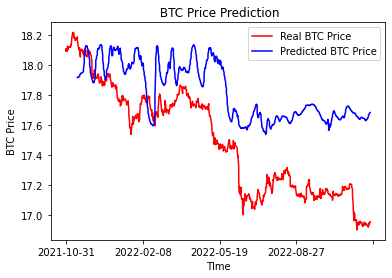

In [ ]:

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')

plt.xticks(np.arange(0,450,100))

plt.title(' BTC Price Prediction')

plt.xlabel('TIme')

plt.ylabel('BTC Price')

plt.legend()
     
plt.show()

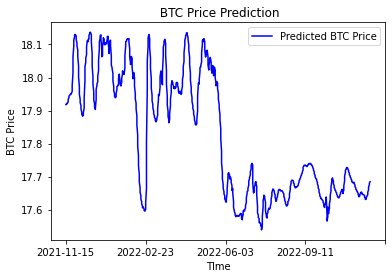

In [ ]:
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')

plt.xticks(np.arange(0,500,100))

plt.title(' BTC Price Prediction')

plt.xlabel('TIme')

plt.ylabel('BTC Price')

plt.legend()
     
plt.show()

In [ ]:
y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
rmse

2.8345691969628217

In [17]:
def measure_accuarcy(predict, real = dataset_test.values[:,0], n_days=1):
    predict_result = []
    real_result = []
    count = 0
    result = 0
    correct_up = 0
    correct_down = 0
    real_up = 0
    real_down = 0
    
    n_predicting_days = predict.shape[0]-n_days
    
    for i in range(0,n_predicting_days):
        if predict[i] > predict[i+n_days]:
            result = 1
        else:
            result = 0
        predict_result.append(result)
    
    for i in range(0,n_predicting_days):
        if real[i] > real[i+n_days]:
            result = 1
        else:
            result = 0
        real_result.append(result)
        
    for i in range(0,n_predicting_days):
        if real_result[i]==1:
            real_up += 1
            if predict_result[i] ==1:
                correct_up += 1
        elif real_result[i]==0:
            if predict_result[i] == 0:
                correct_down += 1
                
    count = correct_up + correct_down
    
    return (count/n_predicting_days,correct_up,correct_down)

In [ ]:
print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')

55.61 %


In [18]:
def measure_diff(predict, real = dataset_test.values[:,0], n_days=1):
    
    predict_result = []
    real_result = []
    result = 0
    predict_diff = 0
    
    n_predicting_days = predict.shape[0]-n_days
    
    for i in range(0,n_predicting_days):
        if predict[i] > predict[i+n_days]:
            result = 1
        else:
            result = 0
        predict_result.append(result)
    
    for i in range(0,n_predicting_days):
        if real[i] > real[i+n_days]:
            result = 1
        else:
            result = 0
        real_result.append(result)
        
    for i in range(0,n_predicting_days):
        if real_result[i]==predict_result[i]:
            predict_diff += abs(predict[i]-real[i])
        else:
            predict_diff -= abs(predict[i]-real[i])
    
    return predict_diff

In [ ]:
measure_diff(original, n_days = 15)

array([22.567825], dtype=float32)

In [19]:
model2 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model2.add(LSTM(100, return_sequences=True))
model2.add(Dropout(0.8))


model2.add(LSTM(100, return_sequences=True))
model2.add(Dropout(0.8))

#model2.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model2.add(LSTM(units = 100, return_sequences = True))
model2.add(Dropout(0.8))

# Adding a third LSTM layer and some Dropout regularisation

model2.add(LSTM(units = 60, return_sequences = True))
model2.add(Dropout(0.8))

model2.add(LSTM(units = 60, return_sequences = True))
model2.add(Dropout(0.8))


model2.add(LSTM(units = 60, return_sequences = True))
model2.add(Dropout(0.8))

# Adding a fourth LSTM layer and some Dropout regularisation

model2.add(LSTM(units = 60))
model2.add(Dropout(0.8))


# Adding the output layer i 
 
model2.add(Dense(units = 1))

# Compiling the RNN

model2.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model2.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 20s 20ms/step - loss: 0.2822
Epoch 2/80
98/98 [==============================] - 2s 20ms/step - loss: 0.1501
Epoch 3/80
98/98 [==============================] - 2s 20ms/step - loss: 0.1378
Epoch 4/80
98/98 [==============================] - 2s 20ms/step - loss: 0.1169
Epoch 5/80
98/98 [==============================] - 2s 20ms/step - loss: 0.1071
Epoch 6/80
98/98 [==============================] - 2s 20ms/step - loss: 0.1090
Epoch 7/80
98/98 [==============================] - 2s 20ms/step - loss: 0.1196
Epoch 8/80
98/98 [==============================] - 2s 23ms/step - loss: 0.1057
Epoch 9/80
98/98 [==============================] - 3s 34ms/step - loss: 0.1009
Epoch 10/80
98/98 [==============================] - 3s 30ms/step - loss: 0.1071
Epoch 11/80
98/98 [==============================] - 2s 20ms/step - loss: 0.1021
Epoch 12/80
98/98 [==============================] - 2s 20ms/step - loss: 0.0974
Epoch 13/80
98/98 [=================

In [20]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0

24/24 [==============================] - 0s 16ms/step


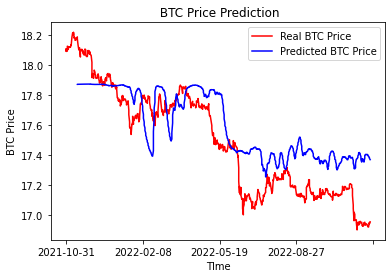

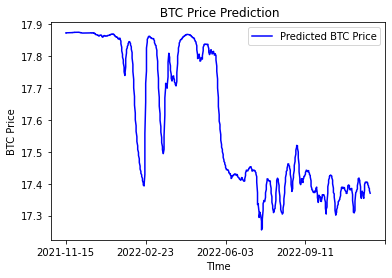

2.958398828790577
59.89 %
[12.369812]


In [39]:
predicted_stock_price = model2.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [ ]:
model3 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model3.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model3.add(LSTM(100, return_sequences=True))
model3.add(Dropout(0.4))


model3.add(LSTM(100, return_sequences=True))
model3.add(Dropout(0.4))

#model3.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model3.add(LSTM(units = 100, return_sequences = True))
model3.add(Dropout(0.4))

# Adding a third LSTM layer and some Dropout regularisation

model3.add(LSTM(units = 100, return_sequences = True))
model3.add(Dropout(0.4))

model3.add(LSTM(units = 100, return_sequences = True))
model3.add(Dropout(0.4))


model3.add(LSTM(units = 100, return_sequences = True))
model3.add(Dropout(0.4))

# Adding a fourth LSTM layer and some Dropout regularisation

model3.add(LSTM(units = 100))
model3.add(Dropout(0.4))


# Adding the output layer i 
 
model3.add(Dense(units = 1))

# Compiling the RNN

model3.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model3.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 13s 24ms/step - loss: 0.1144
Epoch 2/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0499
Epoch 3/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0442
Epoch 4/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0413
Epoch 5/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0381
Epoch 6/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0353
Epoch 7/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0315
Epoch 8/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0325
Epoch 9/80
98/98 [==============================] - 2s 23ms/step - loss: 0.0290
Epoch 10/80
98/98 [==============================] - 2s 25ms/step - loss: 0.0285
Epoch 11/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0280
Epoch 12/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0232
Epoch 13/80
98/98 [=================

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_33 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_28 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_34 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_29 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_35 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_30 (Dropout)        (None, 30, 100)          

24/24 [==============================] - 3s 10ms/step


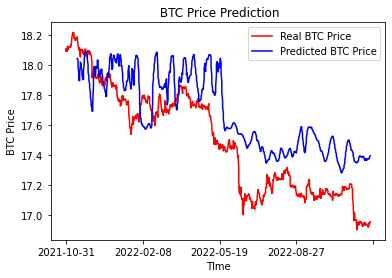

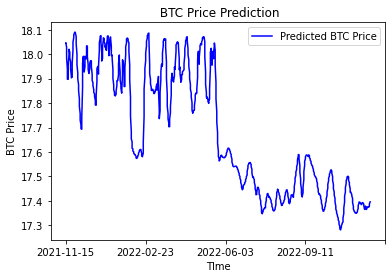

2.8886433075043634
58.02 %
[20.388071]


In [ ]:
predicted_stock_price = model3.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [ ]:
model4 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model4.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model4.add(LSTM(100, return_sequences=True))
model4.add(Dropout(0.8))


model4.add(LSTM(100, return_sequences=True))
model4.add(Dropout(0.8))

#model4.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model4.add(LSTM(units = 100, return_sequences = True))
model4.add(Dropout(0.8))

# Adding a third LSTM layer and some Dropout regularisation

model4.add(LSTM(units = 100, return_sequences = True))
model4.add(Dropout(0.8))

model4.add(LSTM(units = 100, return_sequences = True))
model4.add(Dropout(0.8))


model4.add(LSTM(units = 100, return_sequences = True))
model4.add(Dropout(0.8))

# Adding a fourth LSTM layer and some Dropout regularisation

model4.add(LSTM(units = 100))
model4.add(Dropout(0.8))


# Adding the output layer i 
 
model4.add(Dense(units = 1))

# Compiling the RNN

model4.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model4.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 12s 24ms/step - loss: 0.2458
Epoch 2/80
98/98 [==============================] - 2s 24ms/step - loss: 0.1348
Epoch 3/80
98/98 [==============================] - 2s 23ms/step - loss: 0.1149
Epoch 4/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0999
Epoch 5/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0930
Epoch 6/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0899
Epoch 7/80
98/98 [==============================] - 2s 25ms/step - loss: 0.0961
Epoch 8/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0917
Epoch 9/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0822
Epoch 10/80
98/98 [==============================] - 2s 25ms/step - loss: 0.0820
Epoch 11/80
98/98 [==============================] - 2s 25ms/step - loss: 0.0748
Epoch 12/80
98/98 [==============================] - 2s 25ms/step - loss: 0.0703
Epoch 13/80
98/98 [=================

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_41 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_35 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_42 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_36 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_43 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_37 (Dropout)        (None, 30, 100)          

24/24 [==============================] - 3s 10ms/step


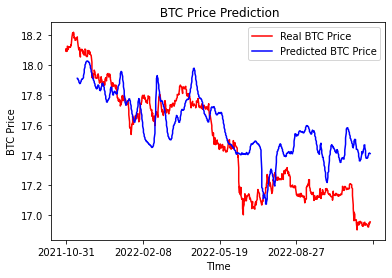

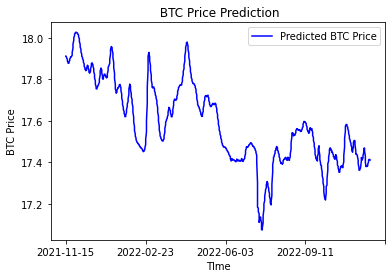

2.982871907037273
61.1 %
[9.456919]


In [ ]:
predicted_stock_price = model4.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [ ]:
model5 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model5.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model5.add(LSTM(100, return_sequences=True))
model5.add(Dropout(0.4))

#model5.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model5.add(LSTM(units = 100, return_sequences = True))
model5.add(Dropout(0.4))

# Adding a third LSTM layer and some Dropout regularisation

model5.add(LSTM(units = 60, return_sequences = True))
model5.add(Dropout(0.4))

model5.add(LSTM(units = 60, return_sequences = True))
model5.add(Dropout(0.4))

# Adding a fourth LSTM layer and some Dropout regularisation

model5.add(LSTM(units = 60))
model5.add(Dropout(0.4))

# Adding the output layer i 
 
model5.add(Dense(units = 1))

# Compiling the RNN

model5.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model5.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 11s 19ms/step - loss: 0.1078
Epoch 2/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0504
Epoch 3/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0438
Epoch 4/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0406
Epoch 5/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0391
Epoch 6/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0359
Epoch 7/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0366
Epoch 8/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0310
Epoch 9/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0305
Epoch 10/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0308
Epoch 11/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0283
Epoch 12/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0275
Epoch 13/80
98/98 [=================

In [ ]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_49 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_42 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_50 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_43 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_51 (LSTM)              (None, 30, 60)            38640     
                                                                 
 dropout_44 (Dropout)        (None, 30, 60)           

24/24 [==============================] - 2s 7ms/step


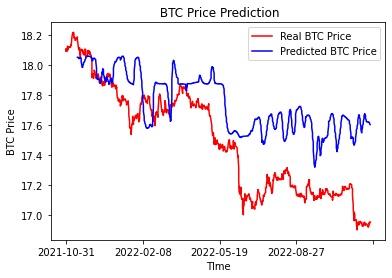

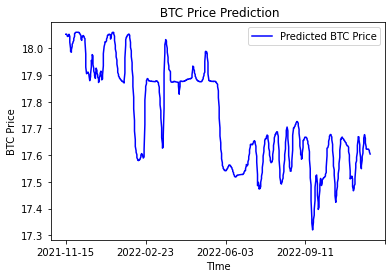

2.8838651293764066
58.02 %
[27.833597]


In [ ]:
predicted_stock_price = model5.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [ ]:
model6 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model6.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model6.add(LSTM(100, return_sequences=True))
model6.add(Dropout(0.8))

#model6.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model6.add(LSTM(units = 100, return_sequences = True))
model6.add(Dropout(0.8))

# Adding a third LSTM layer and some Dropout regularisation

model6.add(LSTM(units = 60, return_sequences = True))
model6.add(Dropout(0.8))

model6.add(LSTM(units = 60, return_sequences = True))
model6.add(Dropout(0.8))

# Adding a fourth LSTM layer and some Dropout regularisation

model6.add(LSTM(units = 60))
model6.add(Dropout(0.8))

# Adding the output layer i 
 
model6.add(Dense(units = 1))

# Compiling the RNN

model6.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model6.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 9s 17ms/step - loss: 0.2427
Epoch 2/80
98/98 [==============================] - 2s 18ms/step - loss: 0.1472
Epoch 3/80
98/98 [==============================] - 2s 18ms/step - loss: 0.1323
Epoch 4/80
98/98 [==============================] - 2s 17ms/step - loss: 0.1193
Epoch 5/80
98/98 [==============================] - 2s 17ms/step - loss: 0.1140
Epoch 6/80
98/98 [==============================] - 2s 17ms/step - loss: 0.1094
Epoch 7/80
98/98 [==============================] - 2s 17ms/step - loss: 0.1022
Epoch 8/80
98/98 [==============================] - 2s 17ms/step - loss: 0.1032
Epoch 9/80
98/98 [==============================] - 2s 18ms/step - loss: 0.1080
Epoch 10/80
98/98 [==============================] - 2s 17ms/step - loss: 0.1025
Epoch 11/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0934
Epoch 12/80
98/98 [==============================] - 2s 17ms/step - loss: 0.0946
Epoch 13/80
98/98 [==================

In [ ]:
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_55 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_47 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_56 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_48 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_57 (LSTM)              (None, 30, 60)            38640     
                                                                 
 dropout_49 (Dropout)        (None, 30, 60)           

24/24 [==============================] - 2s 8ms/step


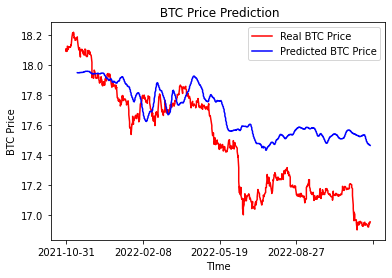

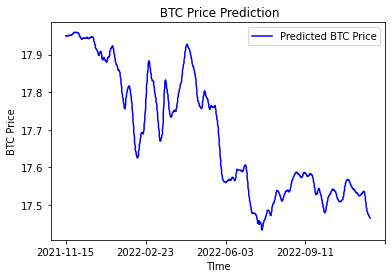

2.9259105188759023
68.72 %
[35.895172]


In [ ]:
predicted_stock_price = model6.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [ ]:
model7 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model7.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model7.add(LSTM(100, return_sequences=True))
model7.add(Dropout(0.4))

#model7.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model7.add(LSTM(units = 100, return_sequences = True))
model7.add(Dropout(0.4))

# Adding a third LSTM layer and some Dropout regularisation

model7.add(LSTM(units = 100, return_sequences = True))
model7.add(Dropout(0.4))

model7.add(LSTM(units = 100, return_sequences = True))
model7.add(Dropout(0.4))

# Adding a fourth LSTM layer and some Dropout regularisation

model7.add(LSTM(units = 100))
model7.add(Dropout(0.4))

# Adding the output layer i 
 
model7.add(Dense(units = 1))

# Compiling the RNN

model7.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model7.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 9s 20ms/step - loss: 0.1062
Epoch 2/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0462
Epoch 3/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0419
Epoch 4/80
98/98 [==============================] - 2s 19ms/step - loss: 0.0392
Epoch 5/80
98/98 [==============================] - 2s 19ms/step - loss: 0.0346
Epoch 6/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0303
Epoch 7/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0299
Epoch 8/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0297
Epoch 9/80
98/98 [==============================] - 2s 19ms/step - loss: 0.0268
Epoch 10/80
98/98 [==============================] - 2s 19ms/step - loss: 0.0259
Epoch 11/80
98/98 [==============================] - 2s 19ms/step - loss: 0.0251
Epoch 12/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0249
Epoch 13/80
98/98 [==================

In [ ]:
model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_61 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_52 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_62 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_53 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_63 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_54 (Dropout)        (None, 30, 100)          

24/24 [==============================] - 2s 8ms/step


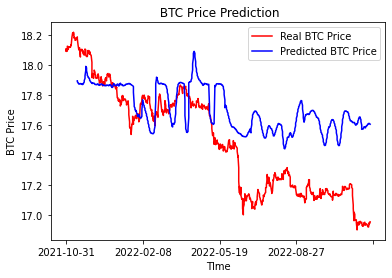

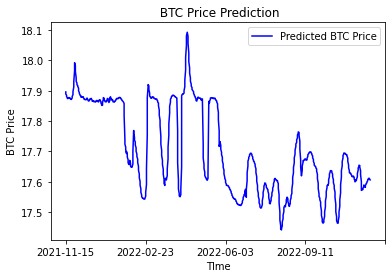

2.9414059260129783
57.49 %
[23.007248]


In [ ]:
predicted_stock_price = model7.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [ ]:
model8 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model8.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model8.add(LSTM(100, return_sequences=True))
model8.add(Dropout(0.8))

#model8.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model8.add(LSTM(units = 100, return_sequences = True))
model8.add(Dropout(0.8))

# Adding a third LSTM layer and some Dropout regularisation

model8.add(LSTM(units = 100, return_sequences = True))
model8.add(Dropout(0.8))

model8.add(LSTM(units = 100, return_sequences = True))
model8.add(Dropout(0.8))

# Adding a fourth LSTM layer and some Dropout regularisation

model8.add(LSTM(units = 100))
model8.add(Dropout(0.8))

# Adding the output layer i 
 
model8.add(Dense(units = 1))

# Compiling the RNN

model8.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model8.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 9s 18ms/step - loss: 0.2267
Epoch 2/80
98/98 [==============================] - 2s 18ms/step - loss: 0.1275
Epoch 3/80
98/98 [==============================] - 2s 18ms/step - loss: 0.1009
Epoch 4/80
98/98 [==============================] - 2s 18ms/step - loss: 0.1035
Epoch 5/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0889
Epoch 6/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0867
Epoch 7/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0816
Epoch 8/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0813
Epoch 9/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0795
Epoch 10/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0771
Epoch 11/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0747
Epoch 12/80
98/98 [==============================] - 2s 18ms/step - loss: 0.0749
Epoch 13/80
98/98 [==================

In [ ]:
model8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_67 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_57 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_68 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_58 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_69 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_59 (Dropout)        (None, 30, 100)          

24/24 [==============================] - 3s 8ms/step


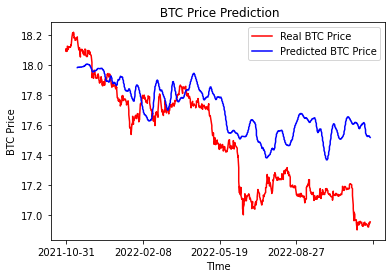

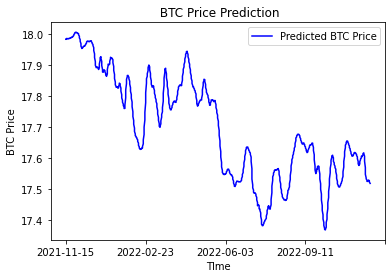

2.916623887232169
66.71 %
[27.176842]


In [ ]:
predicted_stock_price = model8.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [43]:
model9 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model9.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model9.add(LSTM(100, return_sequences=True))
model9.add(Dropout(0.4))


model9.add(LSTM(60, return_sequences=True))
model9.add(Dropout(0.4))

#model9.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model9.add(LSTM(60))
model9.add(Dropout(0.4))

# Adding the output layer i 
 
model9.add(Dense(units = 1))

# Compiling the RNN

model9.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model9.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 7s 11ms/step - loss: 0.1019
Epoch 2/80
98/98 [==============================] - 1s 12ms/step - loss: 0.0431
Epoch 3/80
98/98 [==============================] - 1s 12ms/step - loss: 0.0416
Epoch 4/80
98/98 [==============================] - 2s 24ms/step - loss: 0.0346
Epoch 5/80
98/98 [==============================] - 2s 16ms/step - loss: 0.0356
Epoch 6/80
98/98 [==============================] - 1s 12ms/step - loss: 0.0329
Epoch 7/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0325
Epoch 8/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0309
Epoch 9/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0280
Epoch 10/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0275
Epoch 11/80
98/98 [==============================] - 1s 13ms/step - loss: 0.0254
Epoch 12/80
98/98 [==============================] - 2s 16ms/step - loss: 0.0256
Epoch 13/80
98/98 [==================

In [44]:
model9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_13 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_10 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_14 (LSTM)              (None, 30, 60)            38640     
                                                                 
 dropout_11 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_15 (LSTM)              (None, 60)                29040     
                                                                 
 dropout_12 (Dropout)        (None, 60)               

In [45]:
predicted_stock_price = model9.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

24/24 [==============================] - 2s 8ms/step


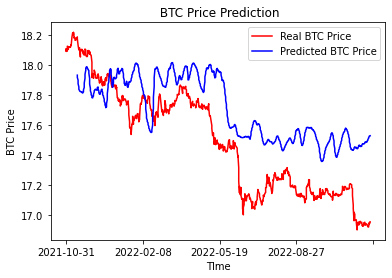

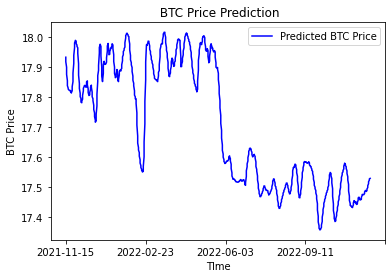

2.900345912823493
58.56 %
[27.62732]


In [46]:
plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [47]:
model10 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model10.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model10.add(LSTM(100, return_sequences=True))
model10.add(Dropout(0.8))


model10.add(LSTM(60, return_sequences=True))
model10.add(Dropout(0.8))

#model10.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model10.add(LSTM(60))
model10.add(Dropout(0.8))

# Adding the output layer i 
 
model10.add(Dense(units = 1))

# Compiling the RNN

model10.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model10.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 6s 12ms/step - loss: 0.2445
Epoch 2/80
98/98 [==============================] - 1s 11ms/step - loss: 0.1419
Epoch 3/80
98/98 [==============================] - 1s 11ms/step - loss: 0.1329
Epoch 4/80
98/98 [==============================] - 1s 15ms/step - loss: 0.1120
Epoch 5/80
98/98 [==============================] - 1s 11ms/step - loss: 0.1150
Epoch 6/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0990
Epoch 7/80
98/98 [==============================] - 2s 16ms/step - loss: 0.1074
Epoch 8/80
98/98 [==============================] - 1s 15ms/step - loss: 0.0991
Epoch 9/80
98/98 [==============================] - 2s 16ms/step - loss: 0.1029
Epoch 10/80
98/98 [==============================] - 2s 22ms/step - loss: 0.1003
Epoch 11/80
98/98 [==============================] - 3s 27ms/step - loss: 0.0970
Epoch 12/80
98/98 [==============================] - 2s 22ms/step - loss: 0.0905
Epoch 13/80
98/98 [==================

24/24 [==============================] - 1s 5ms/step


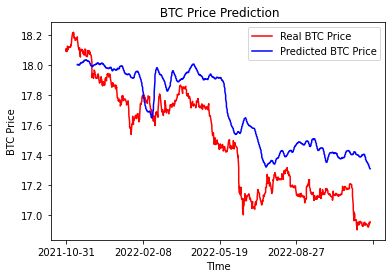

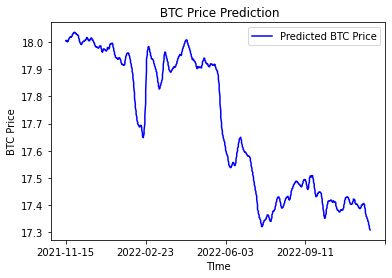

2.868334147441971
69.92 %
[43.493675]


In [48]:
predicted_stock_price = model10.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [49]:
model10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_17 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_13 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_18 (LSTM)              (None, 30, 60)            38640     
                                                                 
 dropout_14 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_19 (LSTM)              (None, 60)                29040     
                                                                 
 dropout_15 (Dropout)        (None, 60)               

In [50]:
model11 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model11.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model11.add(LSTM(100, return_sequences=True))
model11.add(Dropout(0.4))


model11.add(LSTM(100, return_sequences=True))
model11.add(Dropout(0.4))

#model11.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model11.add(LSTM(100))
model11.add(Dropout(0.4))

# Adding the output layer i 
 
model11.add(Dense(units = 1))

# Compiling the RNN

model11.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model11.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 6s 12ms/step - loss: 0.0885
Epoch 2/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0472
Epoch 3/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0385
Epoch 4/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0334
Epoch 5/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0291
Epoch 6/80
98/98 [==============================] - 1s 12ms/step - loss: 0.0275
Epoch 7/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0262
Epoch 8/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0247
Epoch 9/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0226
Epoch 10/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0224
Epoch 11/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0219
Epoch 12/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0211
Epoch 13/80
98/98 [==================

In [51]:
model11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_21 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_16 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_22 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_17 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_23 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_18 (Dropout)        (None, 100)              

24/24 [==============================] - 1s 5ms/step


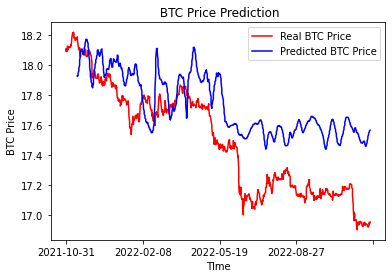

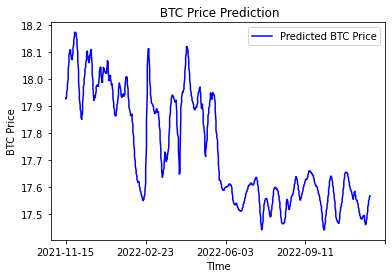

2.878867438279175
55.21 %
[14.842005]


In [52]:
predicted_stock_price = model11.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [53]:
model12 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model12.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model12.add(LSTM(100, return_sequences=True))
model12.add(Dropout(0.8))


model12.add(LSTM(100, return_sequences=True))
model12.add(Dropout(0.8))

#model12.add(RepeatVector(time_step))

# Adding a second LSTM layer and some Dropout regularisation

model12.add(LSTM(100))
model12.add(Dropout(0.8))

# Adding the output layer i 
 
model12.add(Dense(units = 1))

# Compiling the RNN

model12.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model12.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 6s 12ms/step - loss: 0.1970
Epoch 2/80
98/98 [==============================] - 1s 11ms/step - loss: 0.1284
Epoch 3/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0971
Epoch 4/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0984
Epoch 5/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0787
Epoch 6/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0787
Epoch 7/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0757
Epoch 8/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0766
Epoch 9/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0799
Epoch 10/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0762
Epoch 11/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0713
Epoch 12/80
98/98 [==============================] - 1s 11ms/step - loss: 0.0709
Epoch 13/80
98/98 [==================

In [54]:
model12.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_25 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_19 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_26 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_20 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_27 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_21 (Dropout)        (None, 100)              

24/24 [==============================] - 1s 5ms/step


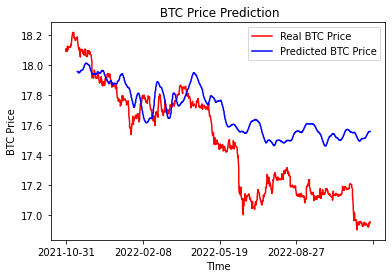

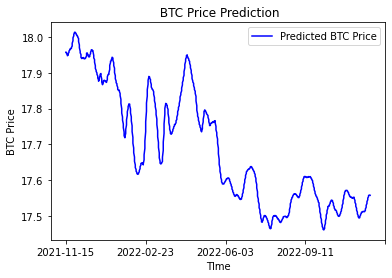

2.9262096870664176
61.23 %
[4.9514313]


In [55]:
predicted_stock_price = model12.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [56]:
model13 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model13.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model13.add(LSTM(60))
model13.add(Dropout(0.4))


# Adding the output layer i 
 
model13.add(Dense(units = 1))

# Compiling the RNN

model13.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model13.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 3s 7ms/step - loss: 0.0817
Epoch 2/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0449
Epoch 3/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0361
Epoch 4/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0341
Epoch 5/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0331
Epoch 6/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0318
Epoch 7/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0311
Epoch 8/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0294
Epoch 9/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0271
Epoch 10/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0285
Epoch 11/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0259
Epoch 12/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0262
Epoch 13/80
98/98 [==============================

In [57]:
model13.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_29 (LSTM)              (None, 60)                38640     
                                                                 
 dropout_22 (Dropout)        (None, 60)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 61        
                                                                 
Total params: 88,701
Trainable params: 88,701
Non-trainable params: 0
_________________________________________________________________


24/24 [==============================] - 1s 4ms/step


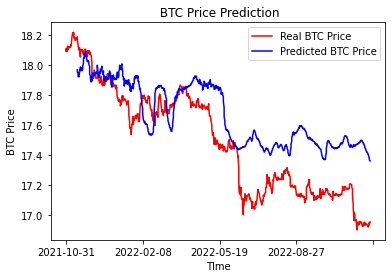

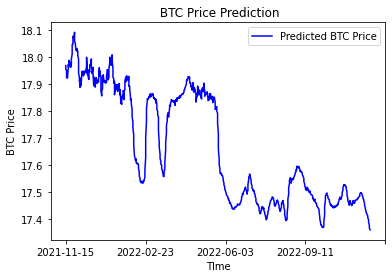

2.918089814169077
63.77 %
[20.050512]


In [58]:
predicted_stock_price = model13.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [59]:
model14 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model14.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model14.add(LSTM(60))
model14.add(Dropout(0.8))


# Adding the output layer i 
 
model14.add(Dense(units = 1))

# Compiling the RNN

model14.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model14.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 4s 7ms/step - loss: 0.2044
Epoch 2/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1160
Epoch 3/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1113
Epoch 4/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1048
Epoch 5/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0931
Epoch 6/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0952
Epoch 7/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0911
Epoch 8/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0949
Epoch 9/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0963
Epoch 10/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0948
Epoch 11/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0890
Epoch 12/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0865
Epoch 13/80
98/98 [==============================

In [60]:
model14.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_31 (LSTM)              (None, 60)                38640     
                                                                 
 dropout_23 (Dropout)        (None, 60)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 61        
                                                                 
Total params: 88,701
Trainable params: 88,701
Non-trainable params: 0
_________________________________________________________________


24/24 [==============================] - 1s 3ms/step


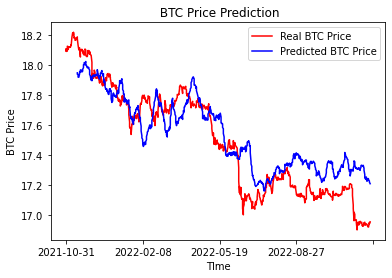

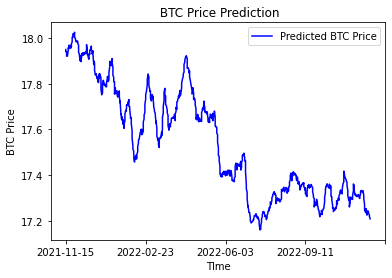

2.9811946524976176
75.0 %
[31.03319]


In [61]:
predicted_stock_price = model14.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [62]:
model15 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model15.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model15.add(LSTM(100))
model15.add(Dropout(0.4))


# Adding the output layer i 
 
model15.add(Dense(units = 1))

# Compiling the RNN

model15.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model15.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 3s 7ms/step - loss: 0.0888
Epoch 2/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0375
Epoch 3/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0320
Epoch 4/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0306
Epoch 5/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0248
Epoch 6/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0263
Epoch 7/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0231
Epoch 8/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0234
Epoch 9/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0226
Epoch 10/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0233
Epoch 11/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0208
Epoch 12/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0215
Epoch 13/80
98/98 [==============================

In [63]:
model15.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_33 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,501
Trainable params: 130,501
Non-trainable params: 0
_________________________________________________________________


24/24 [==============================] - 1s 3ms/step


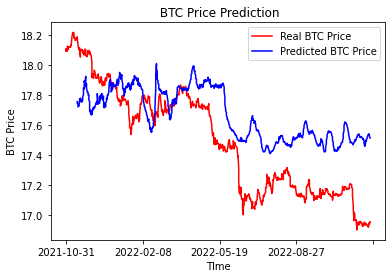

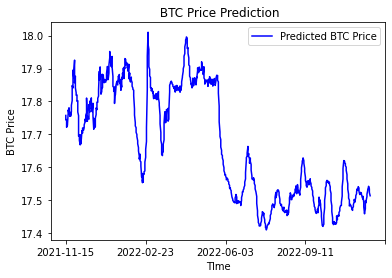

2.9442275432115568
55.61 %
[11.895466]


In [64]:
predicted_stock_price = model15.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [65]:
model16 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model16.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[-2:])))

model16.add(LSTM(100))
model16.add(Dropout(0.8))


# Adding the output layer i 
 
model16.add(Dense(units = 1))

# Compiling the RNN

model16.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model16.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 3s 7ms/step - loss: 0.1754
Epoch 2/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0969
Epoch 3/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0833
Epoch 4/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0809
Epoch 5/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0792
Epoch 6/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0702
Epoch 7/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0676
Epoch 8/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0673
Epoch 9/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0645
Epoch 10/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0656
Epoch 11/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0715
Epoch 12/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0653
Epoch 13/80
98/98 [==============================

In [66]:
model16.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 30, 100)           50000     
                                                                 
 lstm_35 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,501
Trainable params: 130,501
Non-trainable params: 0
_________________________________________________________________


24/24 [==============================] - 1s 4ms/step


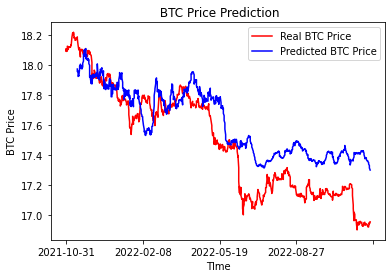

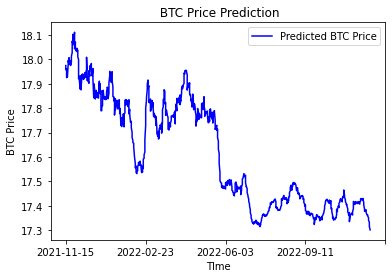

2.938893630868984
72.86 %
[32.387062]


In [67]:
predicted_stock_price = model16.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [68]:
model17 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model17.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[-2:])))

model17.add(LSTM(60))
model17.add(Dropout(0.8))


# Adding the output layer i 
 
model17.add(Dense(units = 1))

# Compiling the RNN

model17.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model17.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 4s 7ms/step - loss: 0.2392
Epoch 2/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1172
Epoch 3/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1105
Epoch 4/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0992
Epoch 5/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0934
Epoch 6/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0915
Epoch 7/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0942
Epoch 8/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0892
Epoch 9/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0887
Epoch 10/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0893
Epoch 11/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0876
Epoch 12/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0907
Epoch 13/80
98/98 [==============================

24/24 [==============================] - 1s 3ms/step


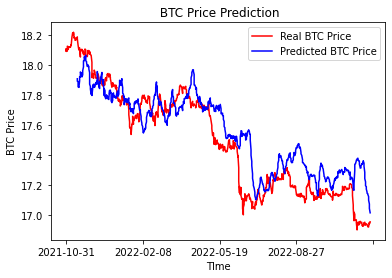

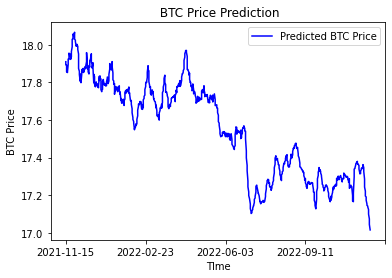

2.9703765041316896
76.87 %
[32.9894]


In [72]:
predicted_stock_price = model17.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [69]:
model18 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model18.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[-2:])))

model18.add(LSTM(40))
model18.add(Dropout(0.8))


# Adding the output layer i 
 
model18.add(Dense(units = 1))

# Compiling the RNN

model18.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model18.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 3s 7ms/step - loss: 0.2613
Epoch 2/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1451
Epoch 3/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1360
Epoch 4/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1312
Epoch 5/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1254
Epoch 6/80
98/98 [==============================] - 1s 11ms/step - loss: 0.1285
Epoch 7/80
98/98 [==============================] - 1s 9ms/step - loss: 0.1182
Epoch 8/80
98/98 [==============================] - 1s 9ms/step - loss: 0.1127
Epoch 9/80
98/98 [==============================] - 1s 10ms/step - loss: 0.1160
Epoch 10/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1129
Epoch 11/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1111
Epoch 12/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1173
Epoch 13/80
98/98 [============================

24/24 [==============================] - 1s 3ms/step


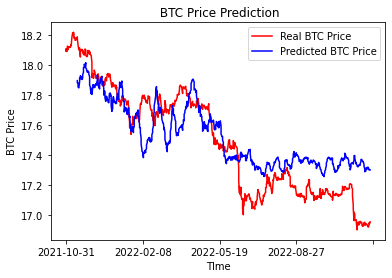

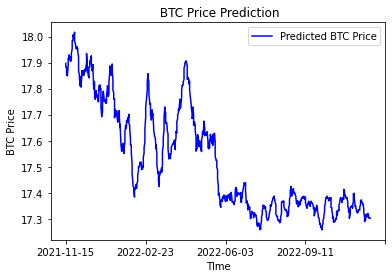

3.0131837526936516
70.19 %
[33.27182]


In [73]:
predicted_stock_price = model18.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [70]:
model19 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model19.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train.shape[-2:])))

model19.add(LSTM(60))
model19.add(Dropout(0.8))


# Adding the output layer i 
 
model19.add(Dense(units = 1))

# Compiling the RNN

model19.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model19.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 3s 7ms/step - loss: 0.2307
Epoch 2/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1240
Epoch 3/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1035
Epoch 4/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1014
Epoch 5/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0912
Epoch 6/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0986
Epoch 7/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0950
Epoch 8/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0943
Epoch 9/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0925
Epoch 10/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0891
Epoch 11/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0822
Epoch 12/80
98/98 [==============================] - 1s 6ms/step - loss: 0.0892
Epoch 13/80
98/98 [==============================

24/24 [==============================] - 1s 3ms/step


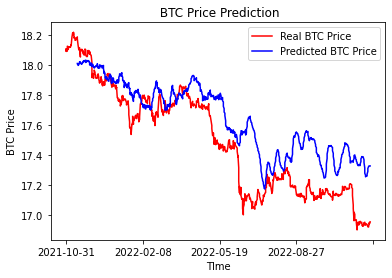

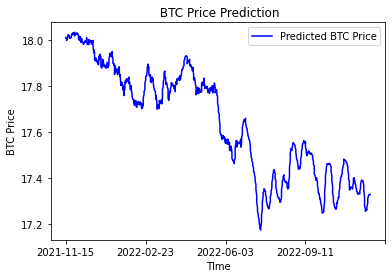

2.914093695475223
72.86 %
[28.905018]


In [74]:
predicted_stock_price = model19.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [71]:
model20 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model20.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train.shape[-2:])))

model20.add(LSTM(40))
model20.add(Dropout(0.8))


# Adding the output layer i 
 
model20.add(Dense(units = 1))

# Compiling the RNN

model20.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model20.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 4s 6ms/step - loss: 0.3252
Epoch 2/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1579
Epoch 3/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1309
Epoch 4/80
98/98 [==============================] - 1s 7ms/step - loss: 0.1304
Epoch 5/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1211
Epoch 6/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1174
Epoch 7/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1165
Epoch 8/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1110
Epoch 9/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1158
Epoch 10/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1145
Epoch 11/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1178
Epoch 12/80
98/98 [==============================] - 1s 6ms/step - loss: 0.1079
Epoch 13/80
98/98 [==============================

24/24 [==============================] - 1s 5ms/step


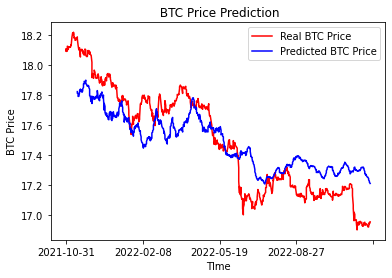

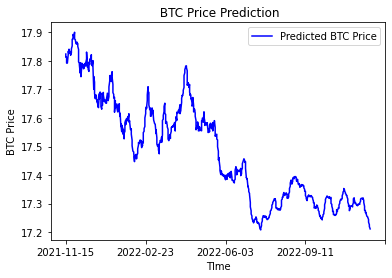

3.0553496472003734
75.67 %
[58.971764]


In [75]:
predicted_stock_price = model20.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))

In [76]:
model21 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model21.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[-2:])))

model21.add(LSTM(50))
model21.add(Dropout(0.8))


# Adding the output layer i 
 
model21.add(Dense(units = 1))

# Compiling the RNN

model21.compile(optimizer = 'adam' , loss = 'mean_squared_error' )

# Fitting the RNN to the Training set

model21.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
98/98 [==============================] - 7s 13ms/step - loss: 0.2157
Epoch 2/80
98/98 [==============================] - 1s 9ms/step - loss: 0.1280
Epoch 3/80
98/98 [==============================] - 1s 8ms/step - loss: 0.1140
Epoch 4/80
98/98 [==============================] - 1s 13ms/step - loss: 0.1103
Epoch 5/80
98/98 [==============================] - 1s 11ms/step - loss: 0.1159
Epoch 6/80
98/98 [==============================] - 1s 9ms/step - loss: 0.1020
Epoch 7/80
98/98 [==============================] - 1s 10ms/step - loss: 0.1039
Epoch 8/80
98/98 [==============================] - 1s 8ms/step - loss: 0.1025
Epoch 9/80
98/98 [==============================] - 1s 9ms/step - loss: 0.0990
Epoch 10/80
98/98 [==============================] - 1s 8ms/step - loss: 0.1004
Epoch 11/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0999
Epoch 12/80
98/98 [==============================] - 1s 7ms/step - loss: 0.0973
Epoch 13/80
98/98 [==========================

24/24 [==============================] - 1s 3ms/step


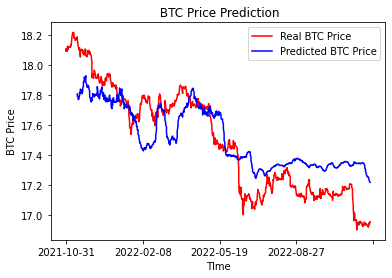

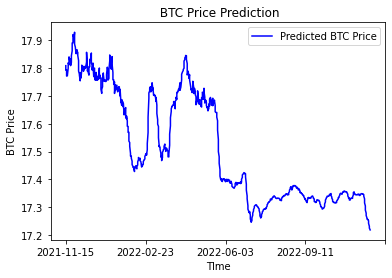

3.0280147105242277
71.93 %
[41.358406]


In [77]:
predicted_stock_price = model21.predict(X_test)
log = feature.iloc[:feature.shape[0]-X_test.shape[0], 0].values
data_mean = log.mean(axis=0) 
data_std = log.std(axis=0)
original = (predicted_stock_price)*data_std+data_mean

plt.plot(df_time.loc[index-time_step:],dataset_test.values[:,0], color = 'red', label = 'Real BTC Price')
plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,450,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()   
plt.show()

plt.plot(df_time.loc[index:],original, color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,500,100))
plt.title(' BTC Price Prediction')
plt.xlabel('TIme')
plt.ylabel('BTC Price')
plt.legend()    
plt.show()

y = feature.iloc[feature.shape[0]-X_test.shape[0]:, 1:2].values
rmse = np.sqrt(np.mean(((original - y) ** 2)))
print(rmse)

print(round(measure_accuarcy(original, n_days = 15)[0]  * 100,2),'%')
print(measure_diff(original, n_days = 15))